In [51]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [52]:
from IPython.display import FileLink

In [53]:
%%R
library(ggplot2)
library(plyr); library(dplyr); library(tidyr)
library(DESeq2)
library(phyloseq)
library(gridExtra)

In [54]:
%%R
dat = read.csv("/home/ashley/single_substrate/data/mg13C_boxplot_norm.csv",header=TRUE)

In [55]:
%%R
print(dat)

  treatment day mg13Cp.u.t.  mg13Cnorm
1        SS   7    0.821786 0.11739800
2        SS  14    4.424498 0.63207114
3        SS  30    1.114139 0.07958134
4        PS   3    1.006950 0.33565005
5        PS   7    0.872367 0.21809175
6        PS  14    1.463809 0.20911552
7        PS  30    2.004344 0.14316742


In [56]:
%%R
dat$treatment = as.character(dat$treatment)
dat$mg13C = as.numeric(dat$mg13Cp.u.t.)

print(dat)

  treatment day mg13Cp.u.t.  mg13Cnorm    mg13C
1        SS   7    0.821786 0.11739800 0.821786
2        SS  14    4.424498 0.63207114 4.424498
3        SS  30    1.114139 0.07958134 1.114139
4        PS   3    1.006950 0.33565005 1.006950
5        PS   7    0.872367 0.21809175 0.872367
6        PS  14    1.463809 0.20911552 1.463809
7        PS  30    2.004344 0.14316742 2.004344


In [57]:
%%R
dat$treatment[dat$treatment == "SS"] = "Cellulose Only"
dat$treatment[dat$treatment == "PS"] = "C Mixture"
dat

       treatment day mg13Cp.u.t.  mg13Cnorm    mg13C
1 Cellulose Only   7    0.821786 0.11739800 0.821786
2 Cellulose Only  14    4.424498 0.63207114 4.424498
3 Cellulose Only  30    1.114139 0.07958134 1.114139
4      C Mixture   3    1.006950 0.33565005 1.006950
5      C Mixture   7    0.872367 0.21809175 0.872367
6      C Mixture  14    1.463809 0.20911552 1.463809
7      C Mixture  30    2.004344 0.14316742 2.004344


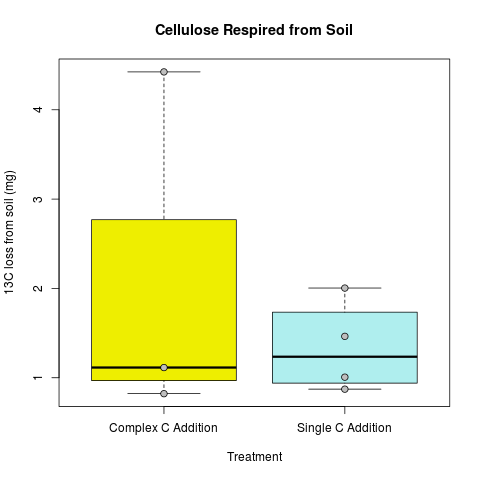

In [58]:
%%R


box = boxplot(mg13C~treatment, data = dat, main="Cellulose Respired from Soil", 
             xlab="Treatment", 
             ylab="13C loss from soil (mg)", 
             names = c("Complex C Addition", "Single C Addition"), 
             col = c("yellow2", "paleturquoise"),
             alpha = 0.9)

dot = stripchart(mg13C~treatment, data = dat, 
            vertical = TRUE, 
            pch = 21, cex = 1.2, bg = "grey", 
            add = TRUE) 


In [59]:
%%R
t.test(dat$mg13C~dat$treatment, var.equal = FALSE, alternative="greater")


	Welch Two Sample t-test

data:  dat$mg13C by dat$treatment
t = 0.6619, df = 2.198, p-value = 0.2853
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.469022       Inf
sample estimates:
mean in group Cellulose Only      mean in group C Mixture 
                    2.120141                     1.336867 



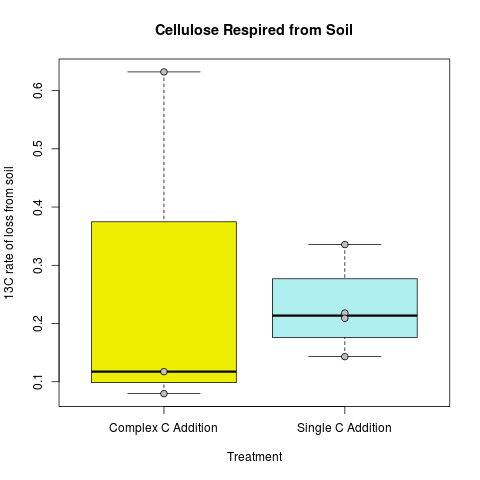

In [60]:
%%R


box = boxplot(mg13Cnorm~treatment, data = dat, main="Cellulose Respired from Soil", 
             xlab="Treatment", 
             ylab="13C rate of loss from soil", 
             names = c("Complex C Addition", "Single C Addition"), 
             col = c("yellow2", "paleturquoise"),
             alpha = 0.9)

dot = stripchart(mg13Cnorm~treatment, data = dat, 
            vertical = TRUE, 
            pch = 21, cex = 1.2, bg = "grey", 
            add = TRUE) 


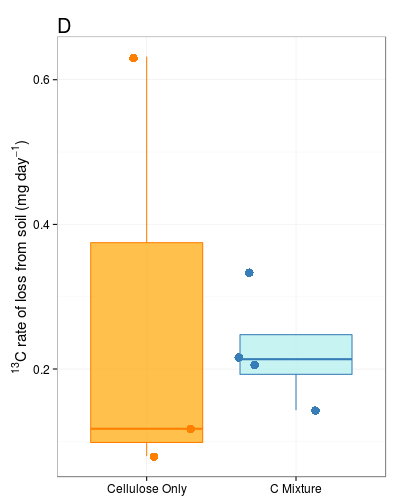

In [61]:
%%R -w 400 -h 500

p4 = ggplot(dat, aes(x = treatment, y = mg13Cnorm, fill=treatment, color = treatment)) 
p4 = p4 + geom_boxplot(outlier.colour = NA, alpha = 0.7)
p4 = p4 + geom_jitter(size = 4)
p4 = p4 + labs(x = NULL, y = expression(paste({}^13,"C", " rate of loss from soil (mg day", {}^-1,")",sep="")))
p4 = p4 + theme_bw()
p4 = p4 + scale_color_manual(values = c("#ff7f00", "#377eb8"))
p4 = p4 + scale_fill_manual(values = c("orange", "paleturquoise"))
#p4 = p4 + scale_fill_manual(values = c("yellow2", "paleturquoise"))
p4 = p4 + theme(axis.title.x = element_text(size=15))
p4 = p4 + theme(axis.title.y = element_text(size=15))
p4 = p4 + theme(axis.text.x = element_text(size=12))
p4 = p4 + theme(axis.text.y = element_text(size=12))
p4 = p4 + theme(legend.position = "none")
p4 = p4 + ggtitle("D")
p4 = p4 + theme(plot.title = element_text(hjust = 0, size = 20))

p4

In [62]:
%%R
t.test(dat$mg13Cnorm~dat$treatment, var.equal = FALSE)


	Welch Two Sample t-test

data:  dat$mg13Cnorm by dat$treatment
t = 0.2729, df = 2.203, p-value = 0.8084
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6704435  0.7701315
sample estimates:
mean in group Cellulose Only      mean in group C Mixture 
                   0.2763502                    0.2265062 



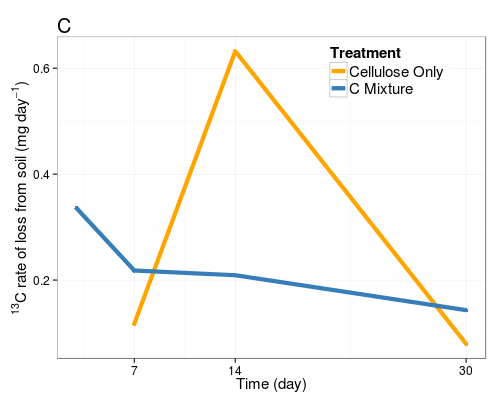

In [63]:
%%R -w 500 -h 400

## ppm
p3 = ggplot(dat, aes(x = day, y = mg13Cnorm, color=treatment)) 
p3 = p3 + geom_point() 
p3 = p3 + geom_line(size=2) 
p3 = p3 + labs(x = "Time (day)", y = expression(paste({}^13,"C", " rate of loss from soil (mg day", {}^-1,")",sep="")),
              color = "Treatment")
p3 = p3 + theme_bw()

p3 = p3 + scale_color_manual(values = c("orange", "#377eb8"))

p3 = p3 + scale_x_continuous(breaks=c(7,14,30))
p3 = p3 + theme(legend.position=c(0.77,0.89))
p3 = p3 + theme(legend.title = element_text(size = 15), legend.text = element_text(size = 15))
p3 = p3 + theme(axis.title.x = element_text(size=15))
p3 = p3 + theme(axis.title.y = element_text(size=15))
p3 = p3 + theme(axis.text.x = element_text(size=12))
p3 = p3 + theme(axis.text.y = element_text(size=12))
p3 = p3 + ggtitle("C")
p3 = p3 + theme(plot.title = element_text(hjust = 0, size = 20))

p3

In [64]:
%%R
dat2 = read.csv("/home/ashley/single_substrate/data/LinReg_soilC.csv",header=TRUE)

In [65]:
%%R
print(dat2)

  treatment day mg13Cinsoil recipro.mg13C
1        SS   0    8.880000     0.1126126
2        SS   7    8.058214     0.1240970
3        SS  14    3.633716     0.2752004
4        SS  30    2.519577     0.3968920
5        PS   0    8.880000     0.1126126
6        PS   3    7.873050     0.1270156
7        PS   7    7.000683     0.1428432
8        PS  14    5.536874     0.1806073
9        PS  30    3.532530     0.2830832


In [66]:
%%R
dat2$treatment = as.character(dat2$treatment)
dat2$treatment[dat2$treatment == "SS"] = "Cellulose Only"
dat2$treatment[dat2$treatment == "PS"] = "C Mixture"
dat2

       treatment day mg13Cinsoil recipro.mg13C
1 Cellulose Only   0    8.880000     0.1126126
2 Cellulose Only   7    8.058214     0.1240970
3 Cellulose Only  14    3.633716     0.2752004
4 Cellulose Only  30    2.519577     0.3968920
5      C Mixture   0    8.880000     0.1126126
6      C Mixture   3    7.873050     0.1270156
7      C Mixture   7    7.000683     0.1428432
8      C Mixture  14    5.536874     0.1806073
9      C Mixture  30    3.532530     0.2830832


In [67]:
%%R
##This is to annotate ggplot with the linear equation and r2 values

lm_eqn = function(m) {

  l <- list(a = format(coef(m)[1], digits = 2),
      b = format(abs(coef(m)[2]), digits = 2),
      r2 = format(summary(m)$r.squared, digits = 3));

  if (coef(m)[2] >= 0)  {
    eq <- substitute(italic(y) == b %.% italic(x) + a*","~~italic(r)^2~"="~r2,l)
  } else {
    eq <- substitute(italic(y) == a - b %.% italic(x)*","~~italic(r)^2~"="~r2,l)    
  }

  as.character(as.expression(eq));                 
}

In [68]:
%%R

SS = subset(dat2, (treatment == "Cellulose Only"))
PS = subset(dat2, (treatment == "C Mixture"))

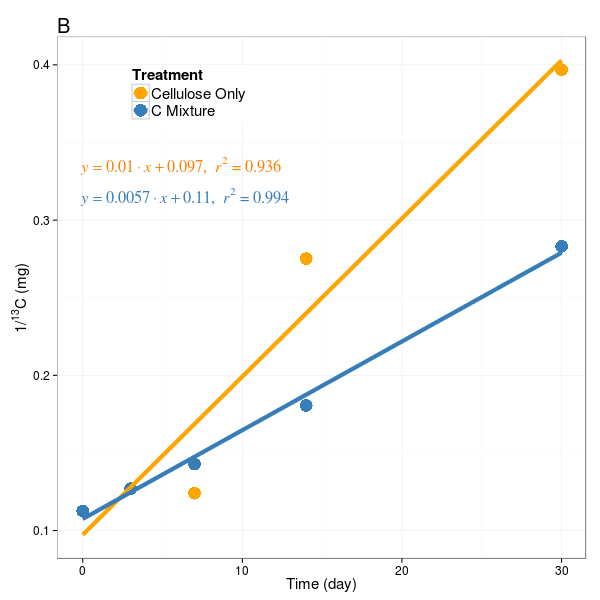

In [112]:
%%R -h 600 -w 600

colours = c("red", "#377eb8", "#4daf4a")

p = ggplot(dat2, aes(y = recipro.mg13C, x = day, color = treatment))

p = p + geom_point(size = 6)

#p = p + geom_abline(aes(intercept=0.2443, slope=0.5147), data=d)

p = p + stat_smooth(method = "lm", se = FALSE, size = 2)

p = p + labs(x = "Time (day)",
            y = expression(paste("1/",{}^13,"C (mg)",sep="")), 
            color = "Treatment")

p = p + theme_bw()
p = p + scale_color_manual(values = c("orange", "#377eb8"))
p = p + scale_fill_manual(values = c("orange", "#377eb8"))
p = p + theme(legend.position=c(0.25,0.89))
p = p + theme(legend.title = element_text(size = 15), legend.text = element_text(size = 15))
p = p + theme(axis.title.x = element_text(size=15))
p = p + theme(axis.title.y = element_text(size=15))
p = p + theme(axis.text.x = element_text(size=12))
p = p + theme(axis.text.y = element_text(size=12))
p = p + ggtitle("B")
p = p + theme(plot.title = element_text(hjust = 0, size = 20))
p = p + annotate("text", x=-0.1, y=0.315, label=lm_eqn(lm(recipro.mg13C ~ day, PS)), hjust=0, size=5.75, 
             family="Times", face="italic", face="bold", parse=TRUE, color = "#377eb8")
p = p + annotate("text", x=-0.10, y=0.335, label=lm_eqn(lm(recipro.mg13C ~ day, SS)), hjust=0, size=5.75, 
             family="Times", face="bold.italic", parse=TRUE, color = "darkorange1")


p

In [70]:
%%R
fit = lm(recipro.mg13C ~ day + treatment, dat2)
summary(fit)


Call:
lm(formula = recipro.mg13C ~ day + treatment, data = dat2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058291 -0.015220  0.003226  0.027551  0.038258 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.127833   0.024457   5.227 0.001963 ** 
day                 0.007794   0.001181   6.600 0.000582 ***
treatmentC Mixture -0.042771   0.025960  -1.648 0.150539    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03855 on 6 degrees of freedom
Multiple R-squared:  0.8901,	Adjusted R-squared:  0.8534 
F-statistic: 24.29 on 2 and 6 DF,  p-value: 0.001328



In [71]:
%%R
anova(fit)

Analysis of Variance Table

Response: recipro.mg13C
          Df   Sum Sq  Mean Sq F value    Pr(>F)    
day        1 0.068155 0.068155 45.8707 0.0005062 ***
treatment  1 0.004033 0.004033  2.7145 0.1505392    
Residuals  6 0.008915 0.001486                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [72]:
%%R
dat3 = read.csv("/home/ashley/single_substrate/data/pctC.csv",header=TRUE)

In [73]:
%%R

dat3 = dat3
levels(dat3$treatment)[levels(dat3$treatment)=="SS"] <- "Cellulose Only"
levels(dat3$treatment)[levels(dat3$treatment)=="PS"] <- "C Mixture"

dat3

        treatment day    mg13C site     pct.C
1  Cellulose Only   7 8.058214 soil 90.745653
2  Cellulose Only  14 3.633716 soil 40.920225
3  Cellulose Only  30 2.519577 soil 28.373618
4       C Mixture   7 7.000683 soil 78.836519
5       C Mixture  14 5.536874 soil 62.352187
6       C Mixture  30 3.532530 soil 39.780747
7  Cellulose Only   7 0.821786  gas  9.254347
8  Cellulose Only  14 5.246284  gas 59.079775
9  Cellulose Only  30 6.360423  gas 71.626382
10      C Mixture   7 1.879317  gas 21.163481
11      C Mixture  14 3.343126  gas 37.647813
12      C Mixture  30 5.347470  gas 60.219253


In [74]:
%%R

dat3 = transform(dat3, 
    day = factor(day, levels=c(7,14,30), 
        labels=c("Day 7", "Day 14", "Day30")))

dat3

        treatment    day    mg13C site     pct.C
1  Cellulose Only  Day 7 8.058214 soil 90.745653
2  Cellulose Only Day 14 3.633716 soil 40.920225
3  Cellulose Only  Day30 2.519577 soil 28.373618
4       C Mixture  Day 7 7.000683 soil 78.836519
5       C Mixture Day 14 5.536874 soil 62.352187
6       C Mixture  Day30 3.532530 soil 39.780747
7  Cellulose Only  Day 7 0.821786  gas  9.254347
8  Cellulose Only Day 14 5.246284  gas 59.079775
9  Cellulose Only  Day30 6.360423  gas 71.626382
10      C Mixture  Day 7 1.879317  gas 21.163481
11      C Mixture Day 14 3.343126  gas 37.647813
12      C Mixture  Day30 5.347470  gas 60.219253


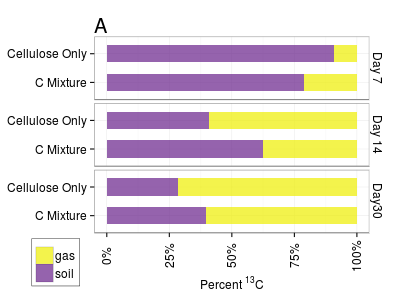

In [135]:
%%R -h 300 -w 400

#colours = c("coral1", "dodgerblue1")
library(scales)
p2 = ggplot(dat3, aes(x = treatment, y = pct.C, fill = site)) 
p2 = p2 + geom_bar(stat = "identity", position = "fill", width = 0.6, alpha = 0.70)
p2 = p2 + facet_grid(day~., space="free_y")
p2 = p2 + scale_y_continuous(labels = percent_format())
p2 = p2 + coord_flip()
p2 = p2 + theme_bw()
p2 = p2 + labs(x = NULL, y = expression(paste("Percent ",{}^13,"C",sep="")), fill = NULL)
p2 = p2 + theme(axis.text.x = element_text(size = 12, angle = 90, vjust = 0.5))
p2 = p2 + theme(axis.text.y = element_text(size = 12))
p2 = p2 + theme(axis.title.y = element_text(size = 12))
p2 = p2 + scale_fill_manual(values = c("yellow2", "darkorchid4"))
#"seagreen3"
p2 = p2 + theme(strip.text.y = element_text(size=12))
p2 = p2 + theme(strip.background = element_rect(fill = "white", colour = "white"))
p2 = p2 + theme(legend.text = element_text(size = 12))
p2 = p2 + theme(legend.position=c(-0.14,-0.15))
p2 = p2 + theme(legend.background = element_rect(color = "black", size = 0.2, linetype = "solid"))
#p2 = p2 + theme(legend.direction = "horizontal")
p2 = p2 + ggtitle("A")
p2 = p2 + theme(plot.title = element_text(hjust = 0, size = 20))

p2

NULL


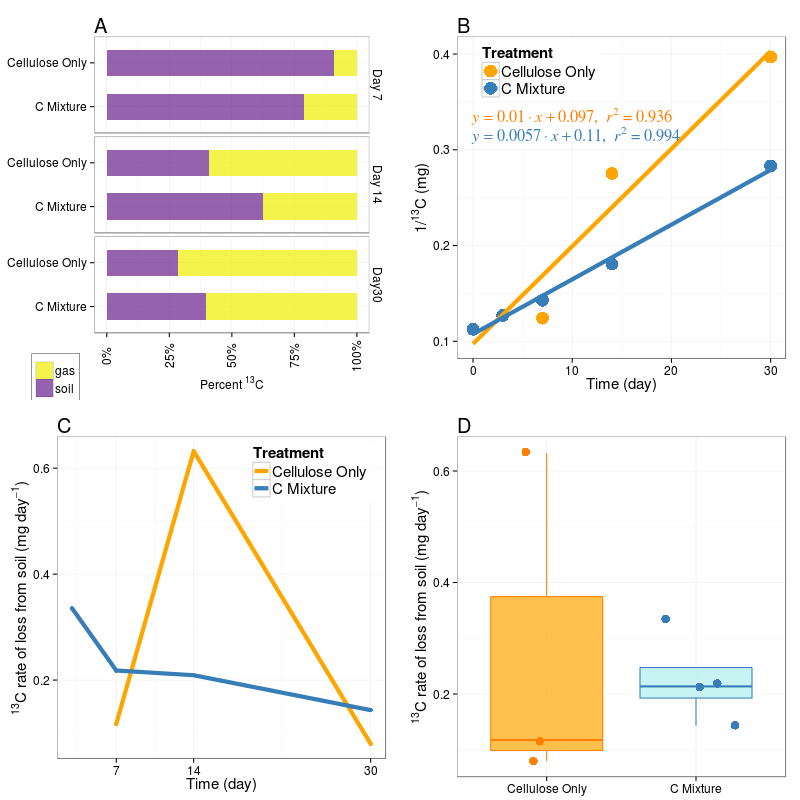

In [136]:
%%R -w 800 -h 800

p.combined = grid.arrange(p2, p, p3, p4, widths = c(2, 2), ncol = 2)

p.combined

In [137]:
%%R
pdf("figs/soilC.pdf", w = 12, h = 10)
print(grid.arrange(p2, p, p3, p4, widths = c(2, 2), ncol = 2))
dev.off()

NULL
png 
  2 


In [138]:
FileLink("figs/soilC.pdf")

/home/ashley/single_substrate/figs/soilC.pdf

In [139]:
%%R
png("figs/soilC.png", w = 12, h = 10, units = "in", res = 600)
print(grid.arrange(p2, p, p3, p4, widths = c(2, 2), ncol = 2))
dev.off()

NULL
png 
  2 


In [80]:
FileLink("figs/soilC.png")

/home/ashley/single_substrate/figs/soilC.png